## Activity 1

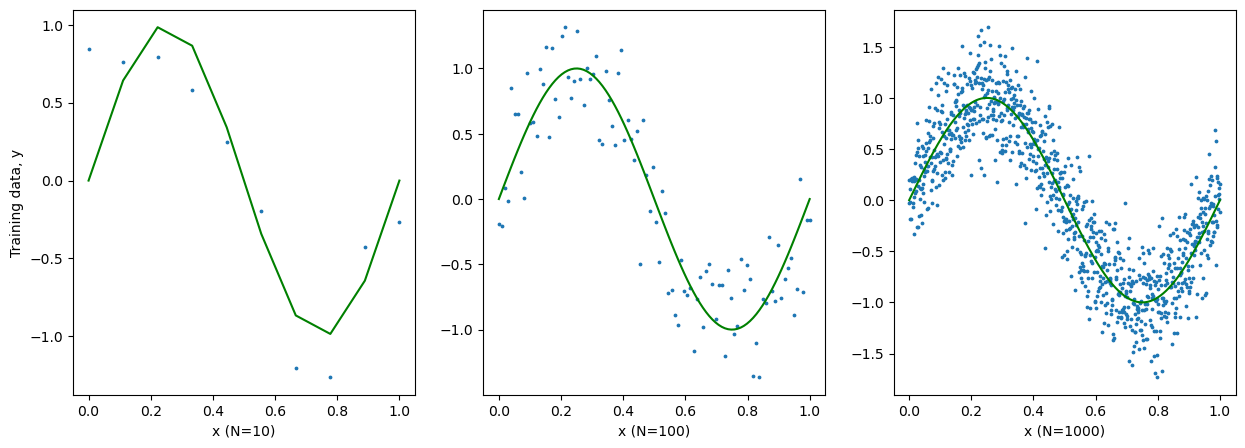

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#independent variable uniformly spaced between 0-1
x1 = np.linspace(0,1,10)
x2 = np.linspace(0,1,100)
x3 = np.linspace(0,1,1000)

#xa = np.random.uniform(0,1,10)
#xb = np.random.uniform(0,1,100)
#xc = np.random.uniform(0,1,1000)

#calculated noisy data
def target(x):
    return np.sin(2*np.pi*x) + np.random.normal(0,0.3,len(x))

def f(x):
    return np.sin(2*np.pi*x)

y1 = target(x1)
y2 = target(x2)
y3 = target(x3)

#plot target data
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(x1,y1,s=3)
ax[0].plot(x1,f(x1),color='green')
ax[0].set_ylabel("Training data, y")
ax[0].set_xlabel("x (N=10)")
ax[1].scatter(x2,y2,s=3)
ax[1].plot(x2,f(x2),color='green')
ax[1].set_xlabel("x (N=100)")
ax[2].scatter(x3,y3,s=3)
ax[2].plot(x3,f(x3),color='green')
ax[2].set_xlabel("x (N=1000)")

fig.savefig('gendata.png')

#### We will use least squares method to determine the coefficients of the polynomial as we don't have the exact solution

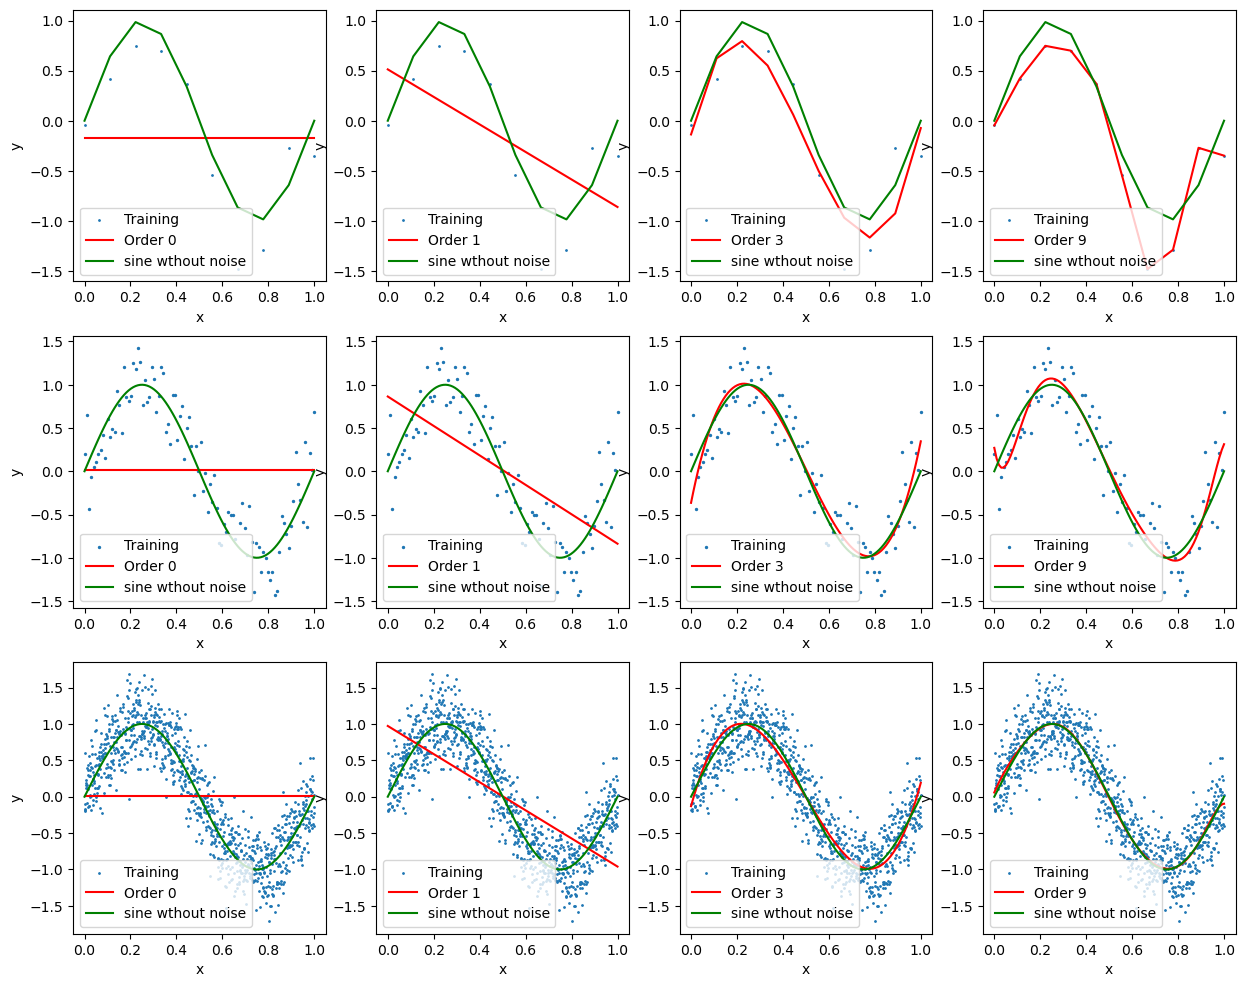

In [52]:
#function for polynomial fitting and prediction
def pf(x, y, order):
    #define Vandermonde matrix
    X = np.vander(x, order + 1, increasing=True)
    #apply least squares method to solve for w
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return np.vander(x, order + 1, increasing=True) @ w

#define the orders and points
orders = [0, 1, 3, 9]
points = [x1, x2, x3]
y_values = [y1, y2, y3]

#create subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 12))

#loop over points
for i, (x, y) in enumerate(zip(points, y_values)):
    #loop over orders
    for j, order in enumerate(orders):
        #apply polynomial fitting and prediction
        y_pred = pf(x, y, order)
        
        #plot the training data and the polynomial fit
        axs[i, j].scatter(x, y, label='Training', s=2 if i == 1 else 1)
        axs[i, j].plot(x, y_pred, color='red', label=f'Order {order}')
        axs[i, j].plot(x, f(x), color='green', label='sine wthout noise')

#add legends and labels
for ax in axs.flat:
    ax.legend()
    ax.set(xlabel='x', ylabel='y')
plt.savefig('Polyfit_N.png')
plt.show()

#### E_rms for 100 points 

In [15]:
y2_pred = pf(x2,y2,9)

erms = np.sqrt(2*np.mean((y2 - y2_pred)**2))

print("RMS value for 100 points = ", erms)

RMS value for 100 points =  0.3739539194221199


#### Splitting data and plotting rms for training and test data with various M

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


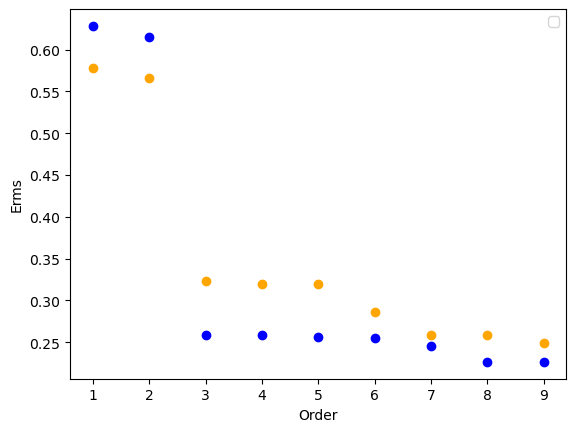

In [49]:
#define size
trn_size = 25
tst_size = 75

#shuffle indices
indices = np.arange(100)
np.random.shuffle(indices)

#using shuffled indices for splitting
trn_ind = indices[:trn_size]
tst_ind = indices[tst_size:]

#split data
x_trn = x2[trn_ind]
y_trn = y2[trn_ind]
x_tst = x2[tst_ind]
y_tst = y2[tst_ind]

order = [1,2,3,4,5,6,7,8,9]

#plot
for j, order_c in enumerate(order):
    
    # Predict on training and test sets
    y_trnp = pf(x_trn,y_trn,order_c) 
    y_tstp = pf(x_tst,y_tst,order_c)
    
    # Calculate root-mean-square errors
    rms_trn = np.sqrt(np.mean((y_trn - y_trnp)**2))
    rms_tst = np.sqrt(np.mean((y_tst - y_tstp)**2))
    
    # Plot errors
    plt.scatter(order_c,rms_trn,color='blue')
    plt.scatter(order_c,rms_tst,color='orange')

plt.xlabel('Order')
plt.ylabel('Erms')
plt.legend()
plt.savefig('erms_vs_order.png')
plt.show()


# Activity 2: We will add an extra term to do ridge regression 

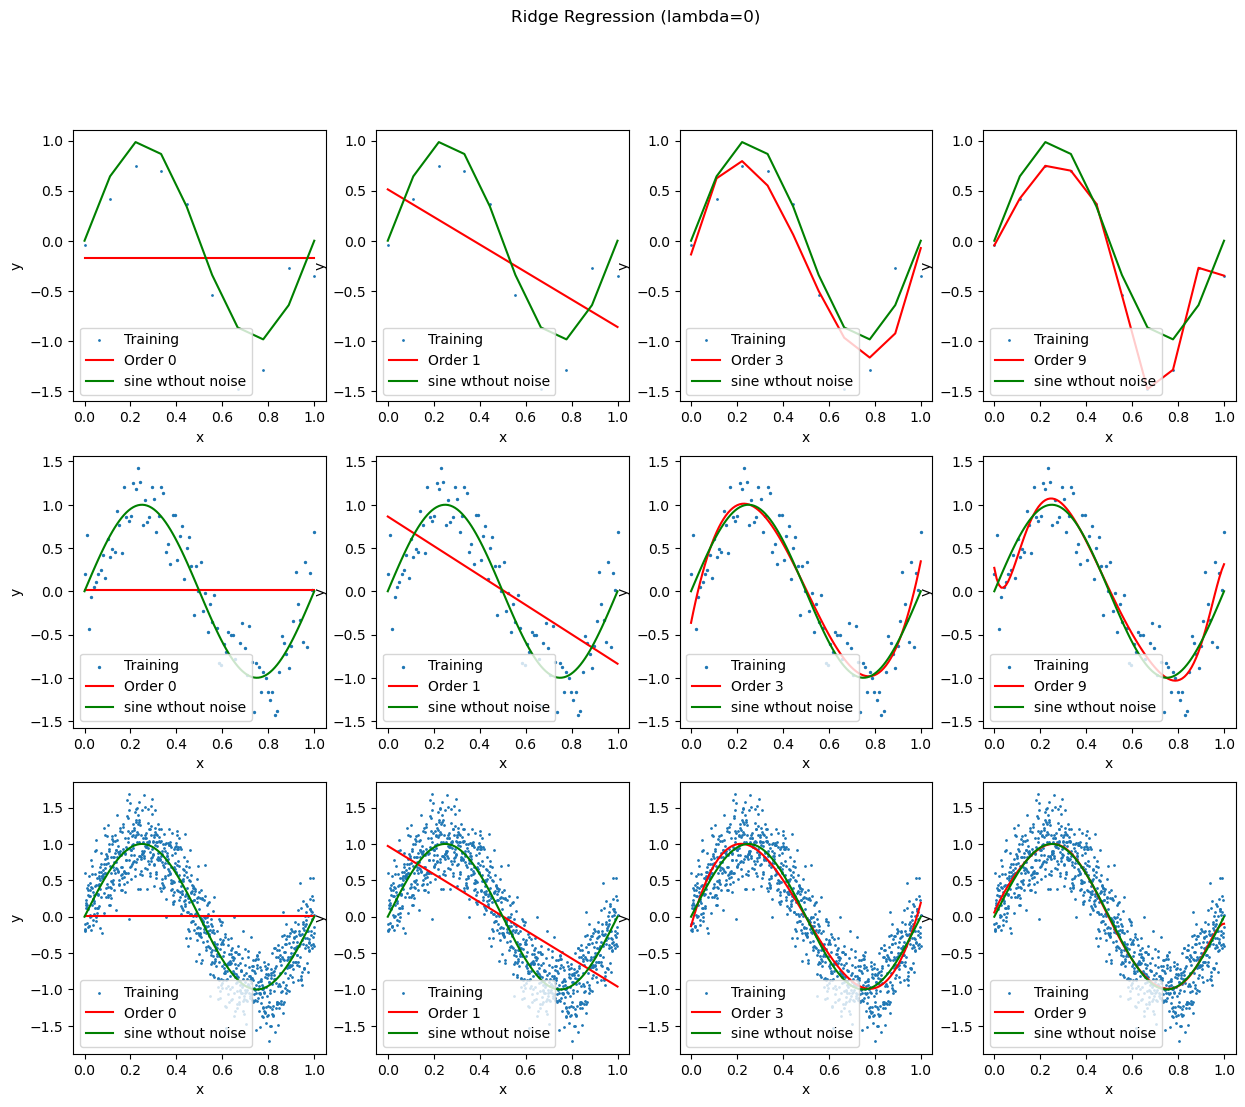

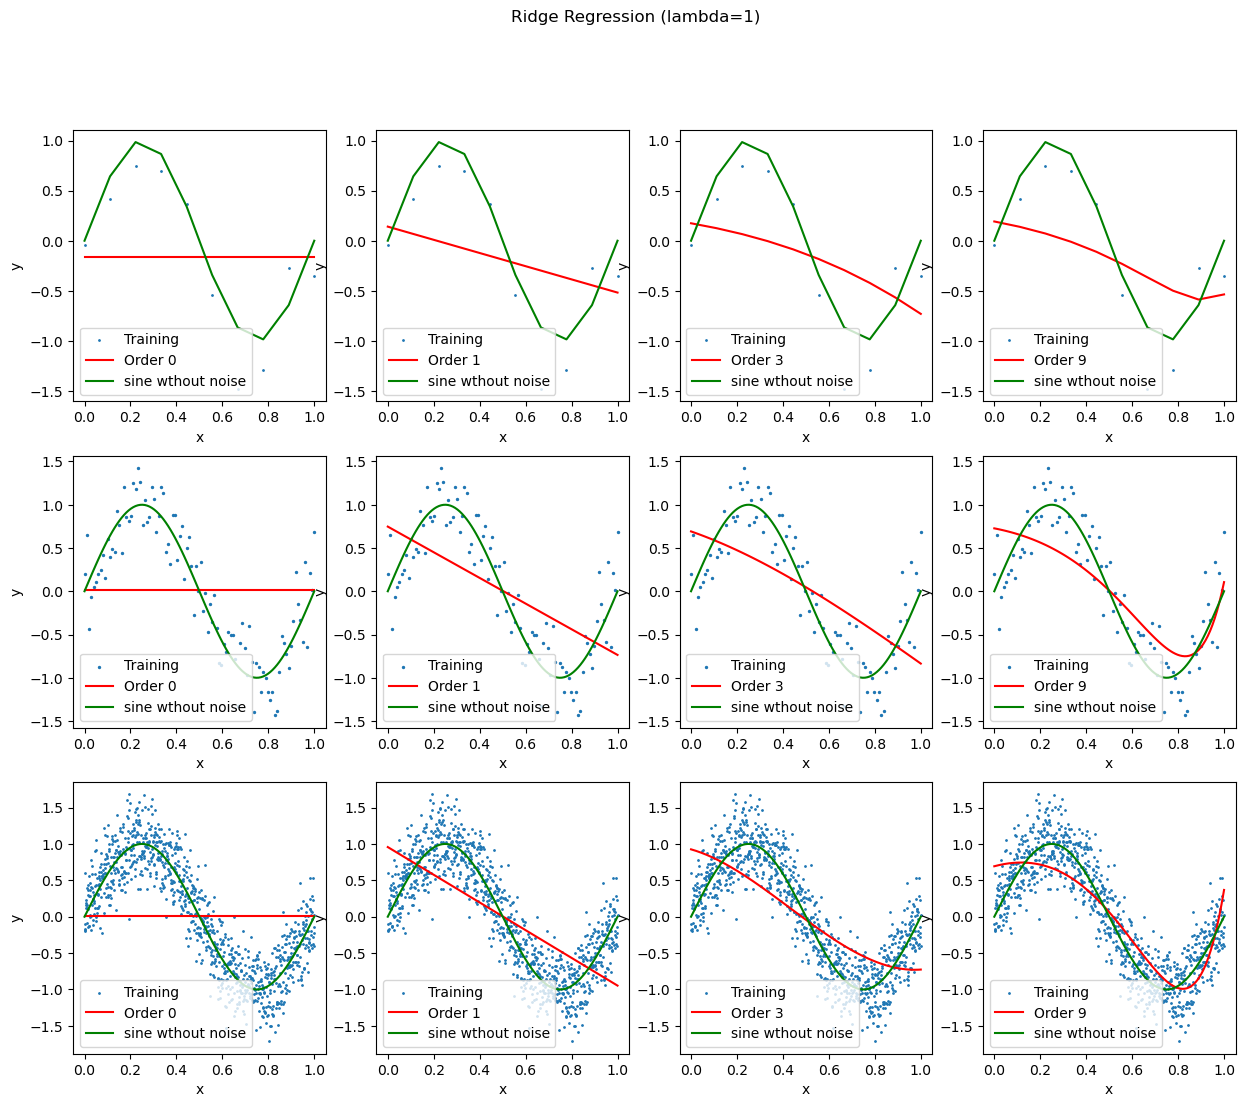

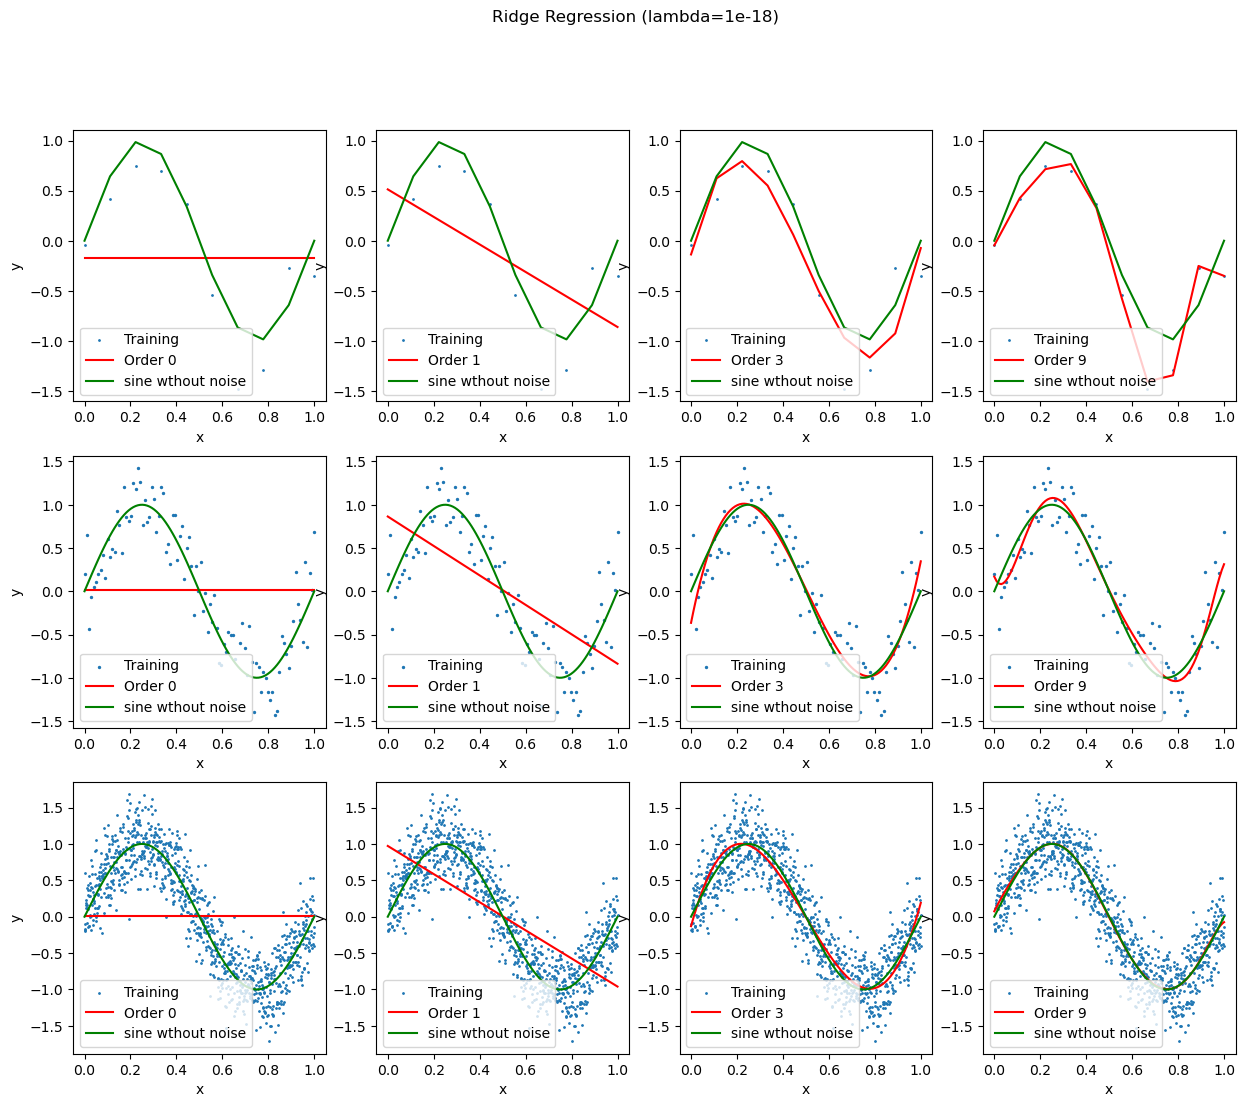

In [50]:
#function for ridge regression
def l2reg(x, y, order, lam):
    X = np.vander(x, order + 1, increasing=True)
    #add regression term
    wr = np.linalg.inv(X.T @ X + lam * np.identity(order + 1)) @ X.T @ y
    return wr

# Function to plot ridge regression results
def plot(points, y_values, orders, lam, title):
    # create subplots
    fig, axs = plt.subplots(3, 4, figsize=(15, 12))
    
    # loop over points
    for i, (x, y) in enumerate(zip(points, y_values)):
        # loop over orders
        for j, order in enumerate(orders):
            # apply ridge regression
            wr = l2reg(x, y, order, lam)
            
            # prediction using the ridge regression coefficients
            y_pred = np.vander(x, order + 1, increasing=True) @ wr
            
            # plotting training data and the polynomial fit
            axs[i, j].scatter(x, y, label='Training', s=2 if i == 1 else 1)
            axs[i, j].plot(x, y_pred, color='red', label=f'Order {order}')
            axs[i, j].plot(x, f(x), color='green', label='sine wthout noise')
    
    # add legends and labels
    for ax in axs.flat:
        ax.legend()
        ax.set(xlabel='x', ylabel='y')
    
    # set title
    plt.suptitle(title)
    plt.savefig(f'Ridge_{lam}.png')
    plt.show()

# Define the orders and points
orders = [0, 1, 3, 9]
points = [x1, x2, x3]
y_values = [y1, y2, y3]

# Plot ridge regression with lambda=0
plot(points, y_values, orders, 0, 'Ridge Regression (lambda=0)')

# Plot ridge regression with lambda=1
plot(points, y_values, orders, 1, 'Ridge Regression (lambda=1)')

# Plot ridge regression with lambda=1e-18
plot(points, y_values, orders, np.exp(-18), 'Ridge Regression (lambda=1e-18)')


# Activity 5: Bayesian approach

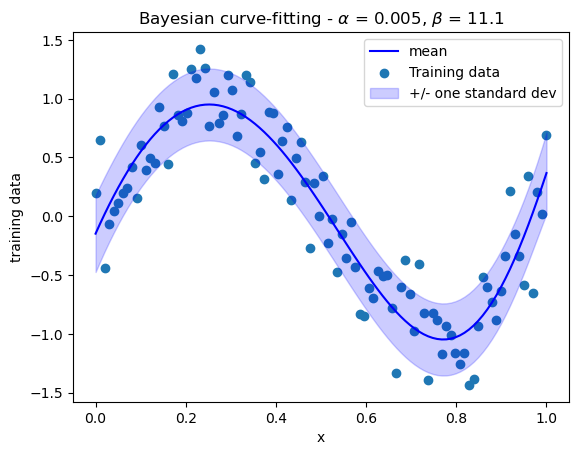

In [51]:
def phi(x, orderb):
    phi_xn = [x ** i for i in range(0, orderb)]
    return np.array(phi_xn)


def s_inverse(x, alpha, beta, orderb):
    phi_x = phi(x, orderb)
    return alpha * np.identity(orderb) + beta * (phi_x @ phi_x.T)


def mean_x(x, y, orderb):
    phi_sum = 0
    for i, val in enumerate(x):
        phi_sum = phi_sum + phi(val, orderb) * y[i]
    
    rh = final_s.dot(phi_sum)
    lh = beta * (phi(x, orderb).T)  
    return lh.dot(rh)


def variance(beta, x):
    rh = final_s.dot(phi(x, orderb))
    rh = (phi(x, orderb).T).dot(rh)
    return (1/beta) + rh

orderb = 9
alpha = 0.005
beta = 11.1

final_s = np.linalg.inv(s_inverse(x2, alpha, beta, orderb))
y_list = mean_x(x2, y2, orderb)
stdev = [np.sqrt(variance(beta, i)) for i in x2] # have to do list comprehension, otherwise produces a matrix


plt.title(r"Bayesian curve-fitting - $\alpha{}$ = 0.005, $\beta$ = 11.1")
plt.plot(x2, y_list, color = "blue", label = "mean")
#plt.plot(x2, f(x2), color = "red", label = "Sine")
plt.scatter(x2, y2, label = "Training data")
plt.fill_between(x2, y_list - stdev, y_list + stdev, label = "+/- one standard dev", color = "b", alpha = 0.2)
plt.xlabel("x")
plt.ylabel("training data")

plt.legend()
plt.savefig(f"bayesiancurve.png")
plt.show()

